In [1]:
%reset -f
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as st
import scipy.special as spec
from scipy import signal
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cm as cm
import scipy.integrate as integrate
import time 

import sys
# sys.path.append('../')
from plot_configuration import *


from PySSD import  Distribution, Detuning,Integrator
from PyRADISE import PySSDHelper

flag_presentation= True
if flag_presentation:
    None

# # Constants
# pi2 = 2*np.pi
# pi = np.pi

# # Set style of plots
# ticksize= 14
# titlesize = 18
# mpl.rcParams.update({'font.size':ticksize }) 
# mpl.rcParams.update({'legend.fontsize':ticksize })# legend
# mpl.rcParams.update({'ytick.labelsize':ticksize })
# mpl.rcParams.update({'xtick.labelsize':ticksize})
# mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
# mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
# mpl.rcParams.update({'figure.titlesize' :titlesize})
# mpl.rcParams.update({'savefig.bbox':'tight'})
# mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
# mpl.rcParams.update({'figure.figsize':[6,5]})
# mpl.rcParams.update({'mathtext.fontset':'cm'})
# mpl.rcParams.update({'font.style':'normal'})
# # mpl.interactive(True)


# mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
# mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# #mpl.style.use('classic')
# #mpl.style.use('default')

# def sci_not(num,dec):
#     exp = int(np.log10(num)+100)-100
#     sci = (r"$%.10f"%(num/10**exp))[:dec+2+1*(dec>0)]+r"\cdot10^{%d}$"%exp
#     return sci


Finished configuring the plots.


In [2]:
%matplotlib notebook

# Modes

In [5]:
N = 1024*8
t = np.arange(N)
mux = 2*np.pi * 0.31
mus = 2*np.pi * 0.002
Qp = 10
dpp= 1e-1
x = np.cos(mux*t + Qp * dpp * np.cos(mus*t))

F,PSD = signal.welch(x)

fft = np.fft.rfft(x)
f   = np.fft.rfftfreq(N)

<IPython.core.display.Javascript object>


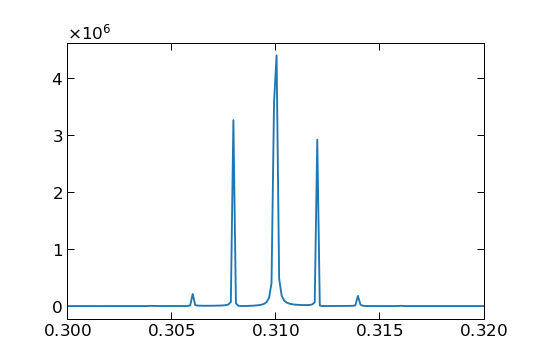

(0.3, 0.32)

In [6]:
plt.figure()
# plt.plot(F,PSD)
plt.plot(f,np.abs(fft)**2)
plt.xlim(0.3,0.32)

<IPython.core.display.Javascript object>


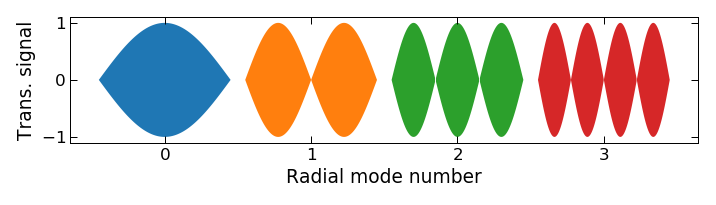

In [7]:
L=0.9
t = np.linspace(0,L,1000)
plt.figure(figsize= (8,2.3))
for m in range(4):
    f=np.sin(t/L*np.pi*(m+1))
    plt.fill_between(t+m-.5*L,f,-f)
plt.xlabel('Radial mode number')
plt.ylabel('Trans. signal')
plt.xticks(np.arange(4))
plt.tight_layout()
plt.savefig('Plots/Mode.eps')

# Wake Diffusion Coefficient

<IPython.core.display.Javascript object>


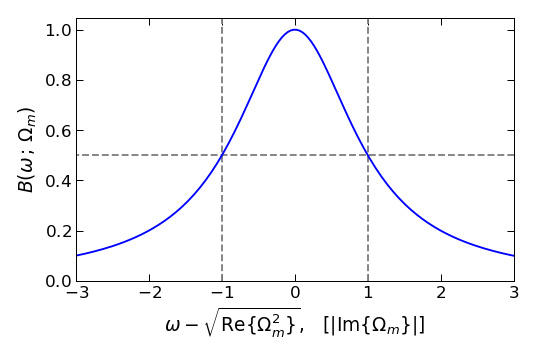

<IPython.core.display.Javascript object>


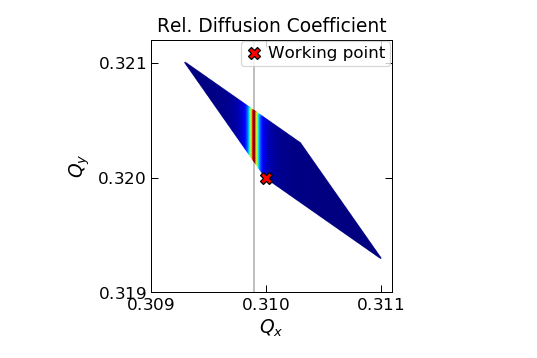

In [9]:

Rew=1000
Imw=1
Rew2=Rew**2-Imw**2
sqRew2=np.sqrt(Rew2)
nwidths=4
w = np.linspace(sqRew2-nwidths*Imw,sqRew2+nwidths*Imw,200)

B = 1/(1 + (Rew2-w**2)**2/(2*Rew*Imw)**2)

# plt.figure(figsize=(6,3))
plt.figure(figsize=(figwidth,figheight*1))
# plt.grid(True)
widthw=[-Imw*4,+Imw*4]
plt.axvline(-Imw,c='gray',ls='--')
plt.axvline(+Imw,c='gray',ls='--')
plt.plot(widthw,[0.5,0.5],'gray',ls='--')
plt.plot(w-sqRew2,B,'b')
plt.ylim(bottom=0)
plt.xlim(-3,3)
# plt.annotate(r'$\dfrac{\Delta \omega}{2} = \mathrm{Im}\{\Omega_m\}$',xy = (0,.3),ha='center')
plt.xlabel(r'$\omega-\sqrt{\mathrm{Re}\{\Omega_m^2\}}$,   $[|\mathrm{Im}\{\Omega_m\}|]$')
plt.ylabel(r'$B(\omega \,;\, \Omega_m)$')
plt.tight_layout()
plt.savefig('Plots/NoiseExcitedDiffusion_Bfunction.eps')


x = np.linspace(0,10,100)
X,Y = np.meshgrid(x,x)

# r = np.linspace(0,10,100)
# phi = np.linspace(0,.5*np.pi,100)
# R,PHI = np.meshgrid(r,phi)
# X = R * np.cos(PHI)
# Y = R * np.sin(PHI)

a= 1e-4
b= -.7*a
Q = 0.31 + a*X+b*Y
Qy= 0.32 + b*X+a*Y
ReQ = 0.31-1e-4
ImQ = 3e-5

ReQ2=ReQ**2-ImQ**2
sqReQ2=np.sqrt(ReQ2)

B = 1/(1 + (ReQ2-Q**2)**2/(2*ReQ*ImQ)**2) 
plt.figure()
ax=plt.gca()
ax.set_aspect('equal')
plt.scatter(Q,Qy,c=B,marker='.',s=1,vmin=0,vmax=1)#,label='Diffusion Coefficient')
plt.axvline(np.sqrt(ReQ2),color='k',lw=0.4)
plt.plot(0.31,0.32,'X',ms=10,mew=1,lw=.1,mfc='r',mec='k',label='Working point')
plt.xlabel(r'$Q_x$')
plt.ylabel(r'$Q_y$')
plt.yticks([0.319,0.32,0.321])
plt.xticks([0.309,0.31,0.311])
plt.legend(loc=0)
plt.axis([0.309,0.3111,0.319,0.3212])
# plt.colorbar(label='Relative $D_{xx}\,/\,J_x$')
plt.title('Rel. Diffusion Coefficient')
plt.tight_layout()
plt.savefig('Plots/NoiseExcitedDiffusion_Bfunction_QxQy.pdf')

# Stability diagram

In [10]:

dist = Distribution.Gaussian()

for j in range(2):
    a=1e-4  * [1,1.3][j]
    b=-0.7*a

    detu = Detuning.LinearDetuning(startTune=0.31,slopex=a,slopey=b)
    integrator = Integrator.Integrator(distribution=dist,detuning=detu,maxJ=18,epsilon = 1e-6*a/1e-4)

    Q = PySSDHelper.get_tune_range(detu,n_samples=100,maxJ=18)
    DQ = np.zeros_like(Q,dtype=np.complex)
    for i,iQ in enumerate(Q):
        DQ[i] = integrator.integrate(Q[i])
        
    if j==0:
        DQ1 = DQ.copy()
    else:
        DQ2 = DQ.copy()


<IPython.core.display.Javascript object>


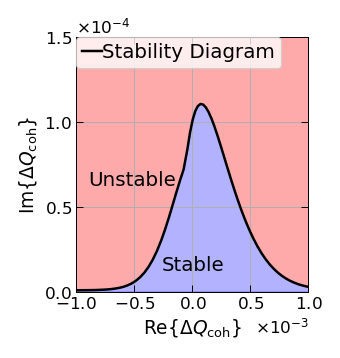

In [11]:
plt.figure(figsize=(3.8,4))
flag_time2=0
plt.grid(True)
mode1 = -1.2e-4+1j*6e-5
mode2 = mode1*0.7


plt.fill_between(np.real(DQ1),0*np.imag(DQ1),np.imag(DQ1),color='b',alpha=0.3)#,label='Stable')
plt.fill_between(np.real(DQ1),np.imag(DQ1),1+np.imag(DQ1),color='#FFAAAA')#,alpha=0.3)#,label='Unstable')
plt.plot(np.real(DQ1),np.imag(DQ1),'k',lw=2,label=r'Stability Diagram')
plt.annotate('Stable',xy=(1e-5,1e-5),va='bottom',ha='center',fontsize=16)
plt.annotate('Unstable',xy=(-1.4e-4,6e-5),va='bottom',ha='right',fontsize=16)

# plt.plot(np.real(DQ1),np.imag(DQ1),'r',label=r'$\varepsilon=\varepsilon_0$')
# plt.plot(mode1.real,mode1.imag,'rx',mew=10,ms=2, label=r'$N=N_0$')

if flag_time2:
    plt.plot(np.real(DQ2),np.imag(DQ2),'b',label=r'$\varepsilon=1.3\,\varepsilon_0$')
    plt.plot(mode2.real,mode2.imag,'bx',mew=10,ms=2,label=r'$N=0.7 \,N_0$')
    
plt.xlim(-10e-4,10e-4)
plt.ylim(0,1.5e-4)
plt.yticks()
plt.legend(loc=2,borderpad=.3,borderaxespad=0,handlelength=1,handletextpad=0,fontsize=16)
plt.xlabel(r'$\mathrm{Re}\{\Delta Q_\mathrm{coh}\}$')
plt.ylabel(r'$\mathrm{Im}\{\Delta Q_\mathrm{coh}\}$')
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=5)
plt.tight_layout()
plt.savefig('Plots/StabilityEvolution_t%d.pdf'%([1,2][flag_time2]))

In [61]:
a = [1,2,3]
b= [2,3,4]
a+b

[1, 2, 3, 2, 3, 4]

In [3]:

epsilon = 1e-6
nQ = 100
n_steps = 1000
a=1e-4  * [1,1.3][0]
b=-0.7*a

dist = Distribution.Gaussian()
detu = Detuning.LinearDetuning(startTune=0.31,slopex=a,slopey=b)
integrator = Integrator.Integrator(distribution=dist,detuning=detu,maxJ=18,nStep=n_steps,epsilon=epsilon)
Q = PySSDHelper.get_tune_range(detu,n_samples=nQ,maxJ=18)

growthrates = [-epsilon,epsilon] +list(np.arange(2e-5,1e-4+epsilon,2e-5))
ngrowthrates= len(growthrates)

print(growthrates)
allDQ = np.zeros((ngrowthrates,nQ),dtype=np.complex)

for j,rate in enumerate(growthrates):
    
    for i,iQ in enumerate(Q):
        integrator._detuning -= 1j*(rate-epsilon)
        allDQ[j,i] = integrator.integrate(Q[i])
        integrator._detuning += 1j*(rate-epsilon)
    
    if j<2:
        allDQ[j,:] = allDQ[j,:]- 1j*rate



[-1e-06, 1e-06, 2e-05, 4e-05, 6.000000000000001e-05, 8e-05, 0.0001]


<IPython.core.display.Javascript object>


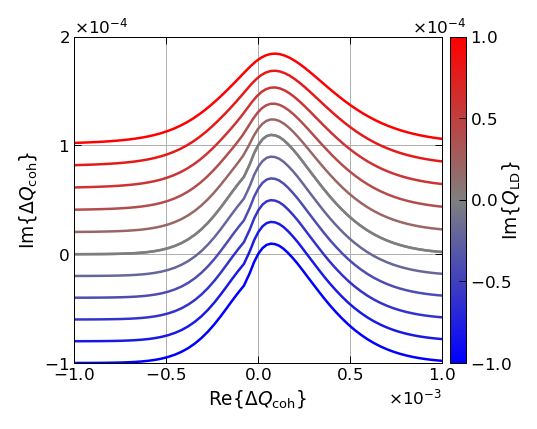

-0.009999999999999998
0.009999999999999998
0.2
0.4
0.6000000000000001
0.8
1.0


In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap

#Make a colormap
basic_cols=['#ff8888', '#333333', '#aaaaff']
basic_cols=['#0000ff', 'gray', '#ff0000']
my_cmap=LinearSegmentedColormap.from_list('mycmap', basic_cols)

# Make a colorbar
c = np.array(growthrates)
norm = mpl.colors.Normalize(vmin=-c.max(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('CMRmap'))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap)
cmap.set_array([])





fig=plt.figure(figsize=(figwidth,figheight*1.2))
maxrate = np.max(growthrates)

mode = 3#1: just positive, 2: include -epsilon, 3: Extrapolate

for j, rate in  enumerate(growthrates):
    print(rate/(maxrate))
    if mode!=2 and j==0: continue 
    if mode<3 and j<2:
        plt.annotate(r'$%s\mathrm{i}\epsilon$'%['-','+'][j],xy=(0,-(1-2*j)*8e-5),va='center')
    lw=[1,2][j!=1 or mode<3]
    lw=2
    plt.plot(allDQ[j].real,allDQ[j].imag,c=cmap.to_rgba((rate)),lw=lw)
    
    if mode==3 :
        plt.plot(allDQ[1].real,allDQ[1].imag-rate*(j>1),c=cmap.to_rgba((-rate)),lw=lw)

    
plt.grid(True)
plt.xlim(-10e-4,10e-4)
plt.ylim(-1e-4,2e-4)
plt.yticks()
#plt.legend(loc=2,borderpad=.3,borderaxespad=0,handlelength=1,handletextpad=0)
plt.xlabel(r'$\mathrm{Re}\{\Delta Q_\mathrm{coh}\}$')
plt.ylabel(r'$\mathrm{Im}\{\Delta Q_\mathrm{coh}\}$')
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=5)
plt.tight_layout()
ax=plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
cb=plt.colorbar(cmap, ticks=np.linspace(-1e-4,1e-4,5),
#             cax=cax,#
                fraction=0.046, pad=0.02
            )
cb.set_label(label=r'$\mathrm{Im}\{Q_\mathrm{LD}\}$', labelpad=-10)

fig.tight_layout()
fig.savefig('Plots/FindDampingrate_%d.eps'%(mode))
fig.savefig('Plots/FindDampingrate_%d.pdf'%(mode))

<IPython.core.display.Javascript object>


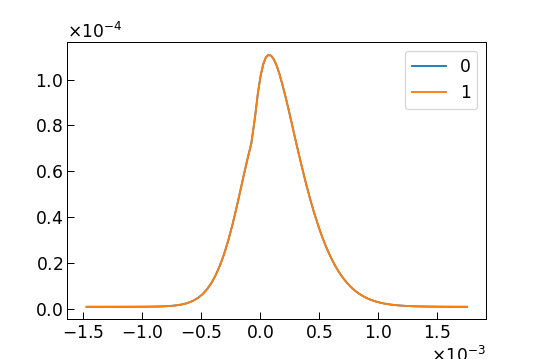

Time of j=0 is: 8.72
Time of j=1 is: 11.08
[-1.47413038e-03+1.01049101e-06j -1.44084760e-03+1.01098413e-06j
 -1.40754798e-03+1.01151504e-06j -1.37423019e-03+1.01208880e-06j
 -1.34089274e-03+1.01276804e-06j -1.30753407e-03+1.01361135e-06j
 -1.27415238e-03+1.01462717e-06j -1.24074563e-03+1.01585226e-06j
 -1.20731149e-03+1.01735408e-06j -1.17384731e-03+1.01923971e-06j
 -1.14035007e-03+1.02167130e-06j -1.10681629e-03+1.02488843e-06j
 -1.07324195e-03+1.02924312e-06j -1.03962240e-03+1.03525206e-06j
 -1.00595218e-03+1.04367158e-06j -9.72224943e-04+1.05560585e-06j
 -9.38433191e-04+1.07266237e-06j -9.04568123e-04+1.09717296e-06j
 -8.70619372e-04+1.13250471e-06j -8.36574764e-04+1.18349350e-06j
 -8.02420071e-04+1.25704096e-06j -7.68138816e-04+1.36292313e-06j
 -7.33712192e-04+1.51486451e-06j -6.99119198e-04+1.73192881e-06j
 -6.64337158e-04+2.04026061e-06j -6.29342846e-04+2.47516742e-06j
 -5.94114517e-04+3.08344077e-06j -5.58635200e-04+3.92565669e-06j
 -5.22897621e-04+5.07795403e-06j -4.86910979e-0

In [5]:
a=1e-4
b=-0.7*a

dist = Distribution.Gaussian()
detu = Detuning.LinearDetuning(startTune=0.31,slopex=a,slopey=b)
plt.figure()
for j in range(2):
    start = time.time()
    n_steps=1000
    if j==0: integrator = Integrator.TrapzIntegrator(distribution=dist,detuning=detu,maxJ=18,n_steps=n_steps)
    if j==1: integrator = Integrator.SimpsonIntegrator(distribution=dist,detuning=detu,maxJ=18,n_steps=n_steps)

    Q = PySSDHelper.get_tune_range(detu,maxJ=18)
    DQ = np.zeros_like(Q,dtype=np.complex)
    for i,iQ in enumerate(Q):
        DQ[i] = integrator.integrate(Q[i])

    print('Time of j=%d is: %.2f'%(j,time.time()-start))
    plt.plot(np.real(DQ),np.imag(DQ),label=j)
    
plt.legend(loc=0)
print(DQ)

# Less noise of multiple measurements

In [44]:
print(mpl.rcParams['axes.prop_cycle'])

cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


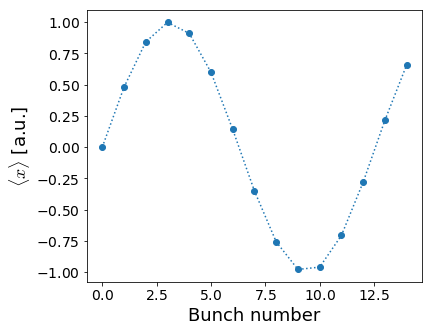

In [46]:
N = 15
x = np.arange(N)

err = np.random.randn(N)*0.1
plt.figure()
plt.plot(x,np.sin(x/2),'o:')
#plt.plot(x,.4*np.cos(x*np.pi),'o:')
plt.xlabel('Bunch number')
plt.ylabel(r'$\langle x \rangle$ [a.u.]')

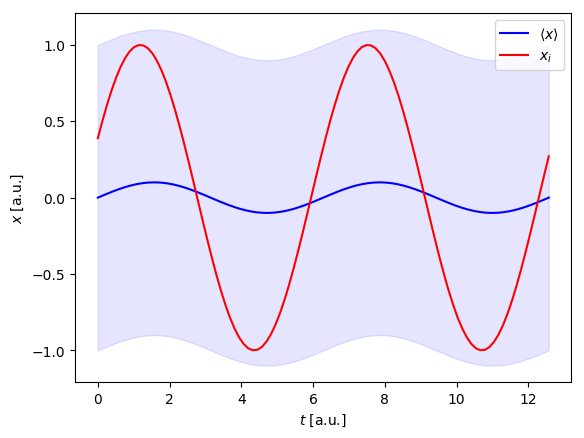

In [34]:
tmax = 2*pi2
NT = 100

t = np.linspace(0,tmax,NT)
xc = 0.1*np.sin(t)
x = 1*np.sin(.4+t*.99)

plt.figure()
plt.fill_between(t,xc-1,xc+1,color='b',alpha=0.1)
plt.plot(t,xc,'b',label=r'$\langle x \rangle$')
plt.plot(t,x,'r',label=r'$x_i$')
plt.legend(loc=0)
plt.xlabel(r'$t$ [a.u.]')
plt.ylabel(r'$x$ [a.u.]')

# Candidacy exam

[  2.40482556   5.52007811   8.65372791  11.79153444  14.93091771
  18.07106397  21.21163663  24.35247153  27.49347913  30.63460647]


([<matplotlib.axis.YTick at 0x7f394a0dc9e8>],
 <a list of 1 Text yticklabel objects>)

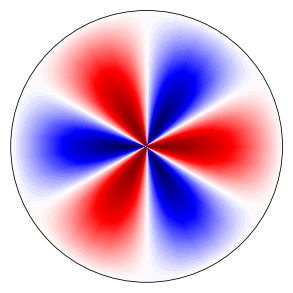

In [24]:
import scipy.special as spec

nulls=spec.jn_zeros(0,10)
print(nulls)
Nr=40
Na=40
r = np.linspace(0,1,Nr)
phi = np.linspace(0,2*np.pi,Na)
# plt.plot(r,spec.jv(0,r*nulls[mr]))



R,PHI = np.meshgrid(r,phi)
mr = 0
ma = 3

F = spec.jv(0,R*nulls[mr]) * np.cos(PHI*ma)

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(PHI, R, F,100,cmap='seismic',vmin=-1,vmax=1)
plt.xticks([0,np.pi/2],['x','p'])
plt.xticks([],[])
plt.yticks([0],[''])
# plt.axvline(linewidth=0.5, color = 'k')
# plt.axhline(linewidth=0.5, color = 'k')


# plt.polar(R,)

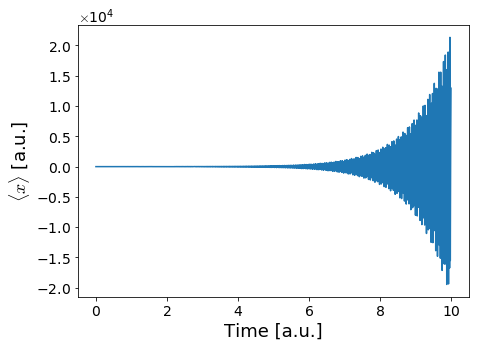

In [26]:
t = np.linspace(0,10,1000)
T=1
y = np.sin(2*np.pi*61.31*t)*np.exp(t/T)
plt.figure(figsize=(7,5))
plt.plot(t,y)
plt.ylabel(r'$\langle x\rangle$ [a.u.]')
plt.xlabel('Time [a.u.]')

In [35]:
xedges_center(np.arange(4))

NameError: name 'edges_center' is not defined